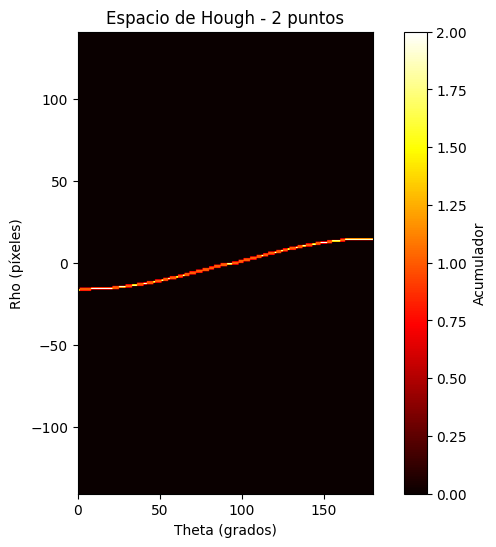

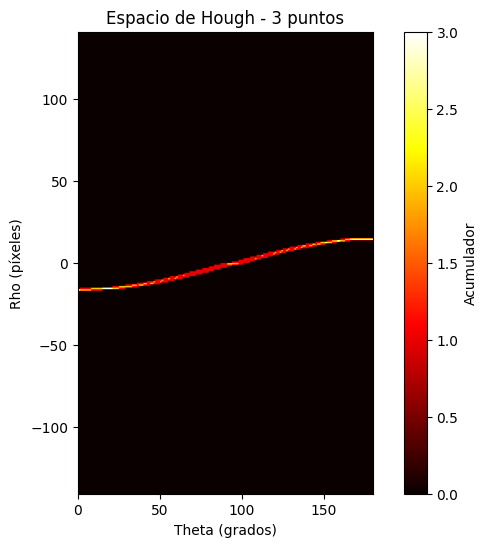

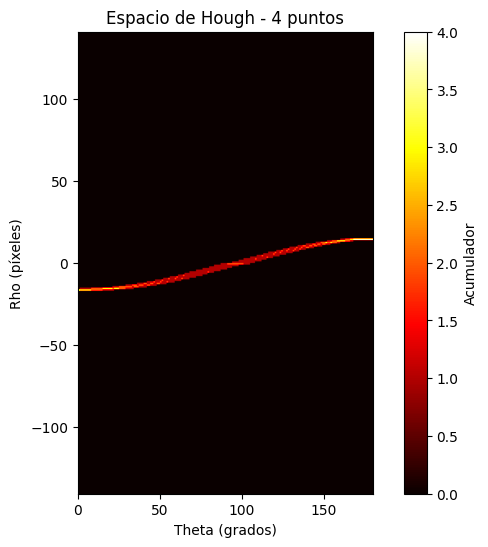

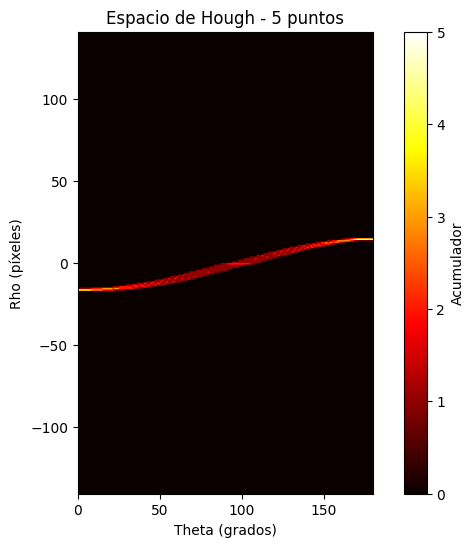

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color

image = io.imread('test.png')
if image.ndim == 3:
    image = color.rgb2gray(image)


image = image[:100, :100]
image_size = image.shape


selected_points = np.column_stack(np.nonzero(image))


points_list = [selected_points[:2], selected_points[:3], selected_points[:4], selected_points[:5]]

theta_range = np.deg2rad(np.arange(0, 180, 1))
diag_len = int(np.sqrt(image_size[0]**2 + image_size[1]**2))

for i, selected_points_subset in enumerate(points_list, start=2):
    accumulator = np.zeros((2 * diag_len, len(theta_range)), dtype=np.int32)
    for (x, y) in selected_points_subset:
        for idx, theta in enumerate(theta_range):
            rho = int(x * np.cos(theta) + y * np.sin(theta)) + diag_len
            accumulator[rho, idx] += 1
    plt.figure(figsize=(8, 6))
    plt.imshow(accumulator, cmap='hot', extent=[0, 180, -diag_len, diag_len])
    plt.xlabel('Theta (grados)')
    plt.ylabel('Rho (píxeles)')
    plt.title(f"Espacio de Hough - {i} puntos")
    plt.colorbar(label='Acumulador')
    plt.show()